In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("Detail_YTD.csv")
data.head()

FileNotFoundError: [Errno 2] File Detail_YTD.csv does not exist: 'Detail_YTD.csv'

In [2]:
datetmp=data.day.str.replace("-"," ")
month=datetmp.str.split(" ",expand=True)[0]
day=datetmp.str.split(" ",expand=True)[1]
year=datetmp.str.split(" ",expand=True)[2]

loctmp=data.center_point.str.replace("POINT\(","")
loctmp=loctmp.str.replace("\)","")
latitude=loctmp.str.split(" ",expand=True)[0]
longitude=loctmp.str.split(" ",expand=True)[1]

strikes=data.number_of_strikes

In [6]:
data['Year']=year.astype(float)
data['Month']=month.astype(float)
data['Day']=day.astype(float)
data['Longitude']=latitude.astype(float)
data['Latitude']=longitude.astype(float)
data['LongitudeR']=latitude.astype(float).round(0)
data['LatitudeR']=longitude.astype(float).round(0)
data['Strikes']=strikes

In [7]:
data.to_csv("2018_mod.csv", index=False, header=True) 
data.head()
# print (data.dtypes)

,day,number_of_strikes,center_point,Year,Month,Day,Latitude,Longitude,LatitudeR,LongitudeR,Strikes
0,2018-01-03,36,POINT(-79.3 24.9),3.0,2018.0,1.0,24.9,-79.3,25.0,-79.0,36
1,2018-01-03,31,POINT(-79.9 25.5),3.0,2018.0,1.0,25.5,-79.9,26.0,-80.0,31
2,2018-01-03,33,POINT(-79.2 25.7),3.0,2018.0,1.0,25.7,-79.2,26.0,-79.0,33
3,2018-01-03,56,POINT(-79.1 25.7),3.0,2018.0,1.0,25.7,-79.1,26.0,-79.0,56
4,2018-01-03,46,POINT(-79.3 25.8),3.0,2018.0,1.0,25.8,-79.3,26.0,-79.0,46


In [8]:
grouped_df=data.groupby('LatitudeR')
Lat=grouped_df['LatitudeR'].sum()/grouped_df['LatitudeR'].count()
Gstrikes=grouped_df['Strikes'].sum()

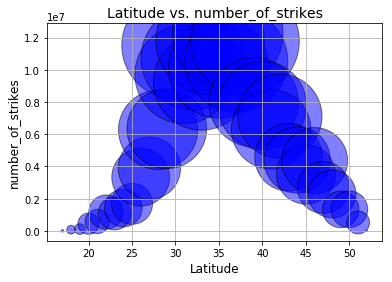

In [9]:

plt.scatter(Lat, Gstrikes, marker="o", facecolors="b", label="Suburban",edgecolors="black", s=Gstrikes/1000, alpha=0.5)
plt.title("Latitude vs. number_of_strikes",fontsize=14)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("number_of_strikes",fontsize=12)
plt.grid()
plt.savefig("LatStrikes.png")

In [7]:
grouped_df=data.groupby('LongitudeR')
Lon=grouped_df['LongitudeR'].sum()/grouped_df['LongitudeR'].count()
Gstrikes=grouped_df['Strikes'].sum()

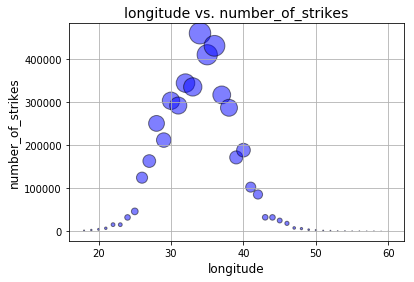

In [8]:
plt.scatter(Lon, Gstrikes, marker="o", facecolors="b", label="Suburban",edgecolors="black", s=Gstrikes/1000, alpha=0.5)
plt.title("longitude vs. number_of_strikes",fontsize=14)
plt.xlabel("longitude",fontsize=12)
plt.ylabel("number_of_strikes",fontsize=12)
plt.grid()
plt.savefig("LonStrikes.png")

In [9]:
grouped_df=data.groupby('Month')
Month=grouped_df['Month'].sum()/grouped_df['Month'].count()
Gstrikes=grouped_df['Strikes'].sum()

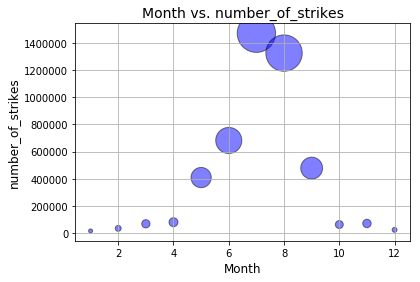

In [12]:
plt.scatter(Month, Gstrikes, marker="o", facecolors="b", label="Suburban",edgecolors="black", s=Gstrikes/1000, alpha=0.5)
plt.title("Month vs. number_of_strikes",fontsize=14)
plt.xlabel("Month",fontsize=12)
plt.ylabel("number_of_strikes",fontsize=12)
plt.grid()
plt.savefig("MonthStrikes.png")